In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataUtils as du
import os
import distanceUtils as dist

TOTAL FRAMES: 252 (252)
INVALID FRAMES: 0, VALID FRAMES: 252
TOTAL FRAMES: 252 (252)
INVALID FRAMES: 0, VALID FRAMES: 252


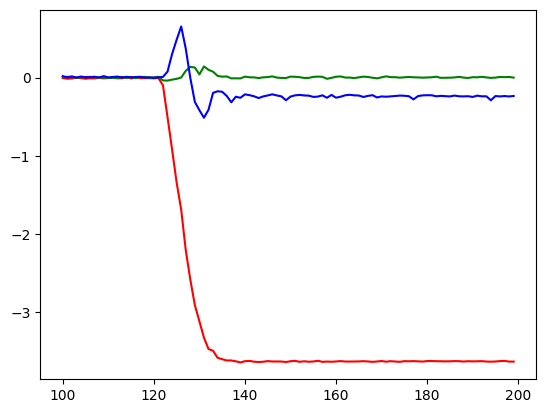

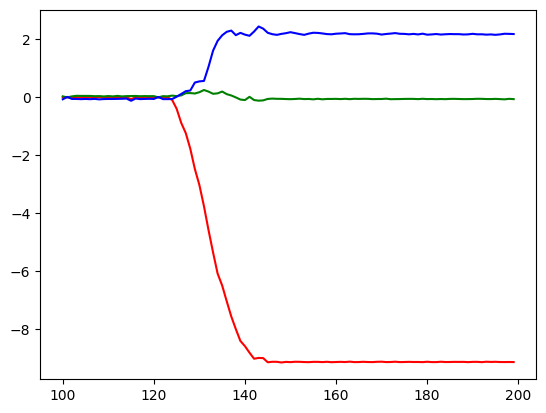

(23126, 8) (252, 8)


<bound method NDFrame.head of        Frame        Time     X_rot     Y_rot     Z_rot   X_trans   Y_trans  \
0          0    0.000000  0.001287  0.001419 -0.016771 -0.000000  0.000000   
1          1    0.033333  0.003721  0.006131 -0.012375 -0.004517 -0.008362   
2          2    0.066667  0.005290  0.000464  0.002303 -0.004456  0.004822   
3          3    0.100000  0.006138  0.002288 -0.001035 -0.011597  0.008667   
4          4    0.133333  0.005741 -0.000357  0.000452 -0.003113  0.012878   
...      ...         ...       ...       ...       ...       ...       ...   
23121  23121  770.700000  0.162590  0.087871 -0.249814 -0.105225  0.026001   
23122  23122  770.733333  0.161409  0.086669 -0.253909 -0.109009  0.034851   
23123  23123  770.766667  0.161817  0.084731 -0.250286 -0.104004  0.030640   
23124  23124  770.800000  0.159181  0.088700 -0.252867 -0.102783  0.028259   
23125  23125  770.833333  0.163083  0.087102 -0.252916 -0.104126  0.029419   

        Z_trans  
0     -0.000000

In [2]:
path_base ="../Data/" #"../Data/person_data/"
hz = 30
a = 150 #acceleration in step

start_offset = 120 #(frame before action) #120 for step20 (isov2),
tracking_rate = 3 #seconds between each image
wanted_frames = 252 #amount of frames to extract
frame_offset = tracking_rate*hz #time between moves
spacing = 1 #how many previous frames that have to be still
t_eps = 0.5 #translational error
r_eps =0.5 #rotational error

#full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\head_hang_10min.csv"
full_path = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\isolation_movement_step5.csv"
full_path2 = r"C:\Users\DGaard\Desktop\Gits\Master_MRI_Phantom\Tracking\Data\isolation_movement_v2.csv"

df = du.load_dataset(0,0,0,path_base,full_path)
df2 = du.load_dataset(0,0,0,path_base,full_path2)
# Change rotations to accurate coordinate system and make translations relative to frame 0
df = du.fixCoordinates(df)
df2 = du.fixCoordinates(df2)

#get frames spaced 0.8
df_valid, valid_idx = du.getValidFrames(df,wanted_frames,frame_offset,start_offset,spacing,t_eps,r_eps)
df_valid2, valid_idx2 = du.getValidFrames(df2,wanted_frames,frame_offset,start_offset,spacing,t_eps,r_eps)

plt.plot(df["X_trans"][100:200],label ="X-trans",c="red")
plt.plot(df["Y_trans"][100:200],label ="Y-trans",c="green")
plt.plot(df["Z_trans"][100:200],label ="Z-trans",c="blue")
plt.show()

plt.plot(df2["X_trans"][100:200],label ="X-trans",c="red")
plt.plot(df2["Y_trans"][100:200],label ="Y-trans",c="green")
plt.plot(df2["Z_trans"][100:200],label ="Z-trans",c="blue")
plt.show()


cols = ["X_trans","Y_trans","Z_trans","X_rot","Y_rot","Z_rot"]

np_valid_20 = df_valid[cols].values
np_df_20 = df[cols].values

np_valid_5 = df_valid2[cols].values
np_df_5 = df2[cols].values


print(df.shape,df_valid.shape)
df.head

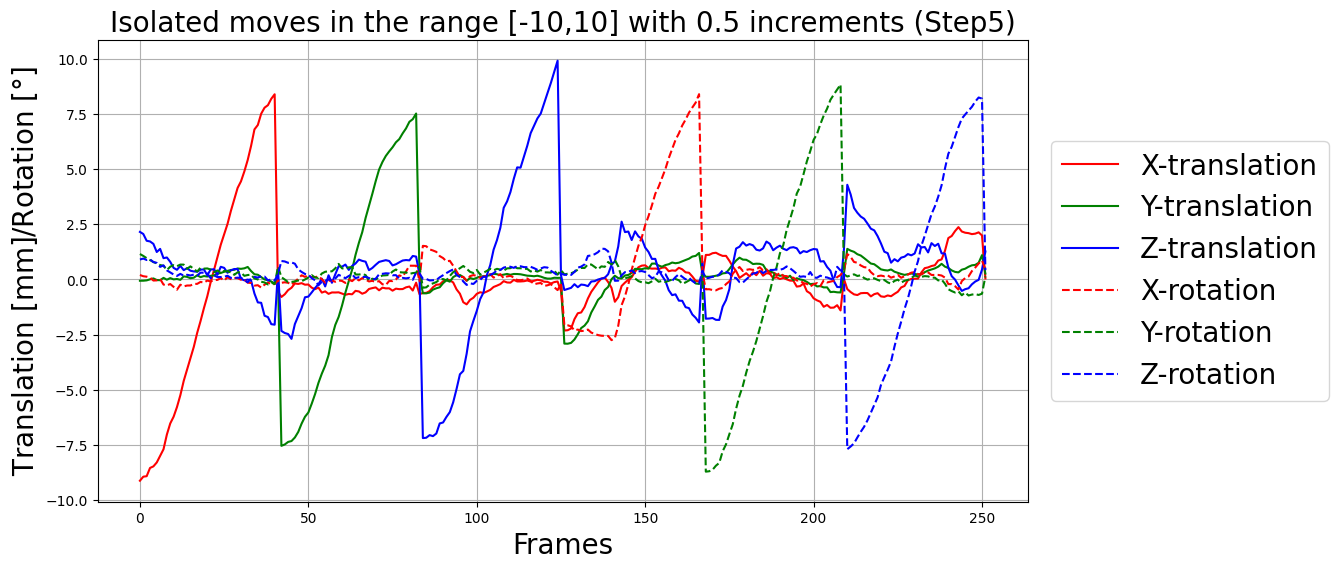

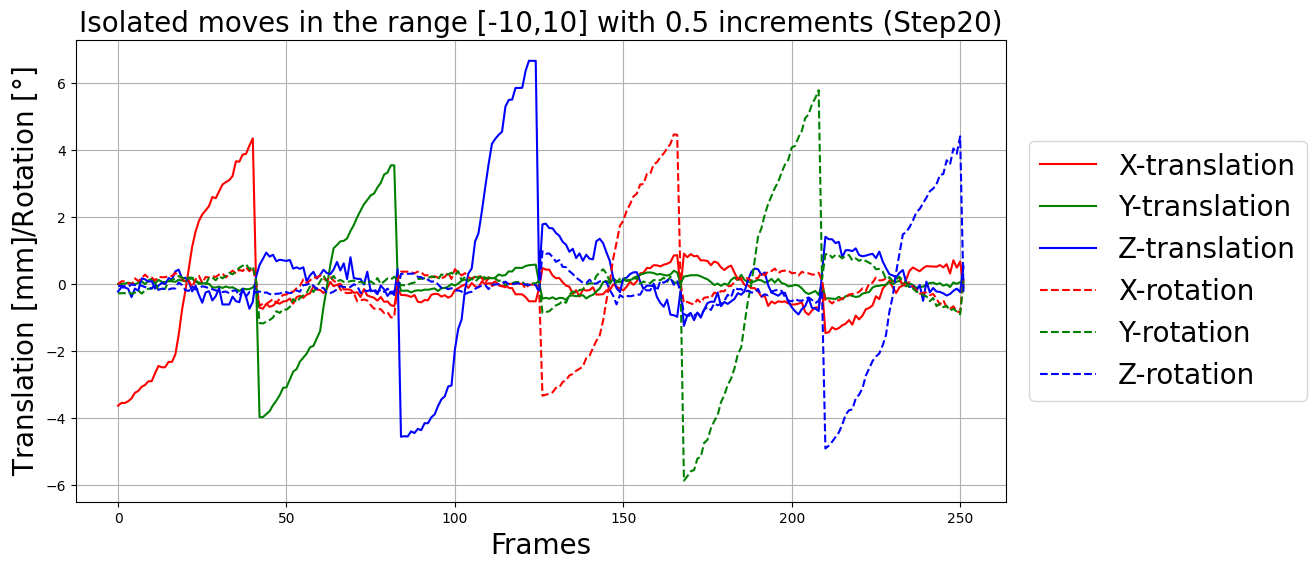

In [3]:
dist.plot_isolated_moves(np_valid_5,title="Step5")
dist.plot_isolated_moves(np_valid_20,title="Step20")

#dist.plot_isolated_moves(np_valid,title="Step5",style="split")

In [4]:
dist.tp_min_max(np_df_5)
dist.tp_min_max(np_df_20)

### MOV: [   X-trans    Y-trans    Z-trans      X-rot      Y-rot      Z-rot] ###
### MIN: [    -9.156     -7.589     -7.968     -2.825     -8.772     -7.709] ###
### MAX: [     8.430      7.538      9.961      8.424      8.919      8.449] ###

### MOV: [   X-trans    Y-trans    Z-trans      X-rot      Y-rot      Z-rot] ###
### MIN: [    -3.645     -4.019     -5.749     -3.402     -5.885     -4.915] ###
### MAX: [     4.354      3.579      6.769      4.480      5.797      4.415] ###



(array([-3.645264, -4.018799, -5.749206, -3.401767, -5.885209, -4.914659]),
 array([4.354126, 3.579468, 6.769227, 4.480206, 5.79736 , 4.415058]))